In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from skimage import color
# from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

### Loading datas

In [2]:
# loading datas
from keras.datasets import cifar10
(x_train,y_train) , (x_test,y_test) = cifar10.load_data()
reshaped_all_datas = np.concatenate((x_train,x_test))

### Plotting 10 random images

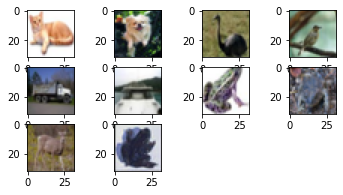

In [3]:
#plotting 10 random images from batch1
randomlist = random.sample(range(0, len(reshaped_all_datas)), 10)

for i in range(10):
    plt.subplot(4,4,i+1)
    plt.imshow(reshaped_all_datas[randomlist[i]])
plt.show()

We have three types of datas: <br>
1- training <br>
2- validation <br>
3- test <br> <br>

Also we have three types of training datas <br>
1- Batch based : All data pints are applied, simultaneously <br>
2- Stochastic based: Data are shuffled and then data points are applied one by one <br>
3- Stochastic mini batch based: training data set are randomly divided to a certain number of subsets (minbatches); then at each time a min-batch is chosen and applied <br><br>

### Pre Processing

In [4]:
#converting RGB to Grayscale (takes too much time)
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

temp = []
for i in range(len(reshaped_all_datas)):
    img = reshaped_all_datas[i]
    ig = rgb2gray(img)
    ig = ig.reshape(1,32,32)
    temp.extend(ig.tolist())
reshaped_all_datas = np.array(temp)

In [5]:
#finding max and min in all datas
all_data_max = np.amax(reshaped_all_datas)
all_data_min = np.amin(reshaped_all_datas)
#normalizing datas
normalized_all_datas = reshaped_all_datas.astype('float32')/(all_data_max - all_data_min)

### MLP

##### Creating Dataset

In [6]:
Y = np.concatenate((y_train,y_test)) #target
X = normalized_all_datas #input
(x_train,x_valid,x_test) = X[:40000],X[40000:50000],X[50000:]
(y_train,y_valid,y_test) = Y[:40000],Y[40000:50000],Y[50000:]

#uncomment if rgb to grayscale used
x_train = x_train.reshape(x_train.shape[0],32,32,1)
x_valid = x_valid.reshape(x_valid.shape[0],32,32,1)
x_test = x_test.reshape(x_test.shape[0],32,32,1)

y_train = tf.keras.utils.to_categorical(y_train,10)
y_valid = tf.keras.utils.to_categorical(y_valid,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

#### Creating Model

In [7]:
from keras import layers
model = tf.keras.Sequential()

activation_func = 'relu'
# activation_func = tf.keras.activations.tanh
# activation_func = tf.keras.activations.sigmoid
# activation_func = tf.keras.activations.softmax

#CNN
# model.add(layers.Conv2D(filters=35, kernel_size=2, padding='same', activation=activation_func, input_shape=(32,32,1))) 
# model.add(layers.MaxPooling2D(pool_size=2))
# model.add(layers.Dropout(0.2))
# model.add(layers.Conv2D(filters=50, kernel_size=2, padding='same', activation=activation_func))
# model.add(layers.MaxPooling2D(pool_size=2))
# model.add(layers.Dropout(0.2))
# model.add(layers.Flatten())


model.add(layers.Flatten(input_shape = (32, 32, 1)))
model.add(layers.Dense(500, activation=activation_func))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(400, activation=activation_func))
model.add(layers.Dropout(0.3))

# model.add(layers.Dense(150, activation=activation_func))
# model.add(layers.Dropout(0.3))

# model.add(layers.Dense(150, activation=activation_func))
# model.add(layers.Dropout(0.4))

# model.add(layers.Dense(150, activation=activation_func))
# model.add(layers.Dropout(0.3))

#last layer
model.add(layers.Dense(10, activation='softmax'))

#### Compiling the Model

In [8]:
loss_func = 'categorical_crossentropy'
# loss_func = 'mean_squared_error'
# loss_func = 'mean_absolute_error'

optimizer_func = 'adam'
# optimizer_func = tf.keras.optimizers.SGD(learning_rate = 0.1)
# optimizer_func = tf.keras.optimizers.Adagrad(learning_rate = 0.1)

model.compile(loss=loss_func,
              optimizer=optimizer_func,
              metrics=['accuracy'])

#### Training Model

In [9]:
import datetime
start = datetime.datetime.now()
trainedModel = model.fit(x_train, y_train, batch_size=512, epochs=50, validation_data = (x_valid,y_valid))
end = datetime.datetime.now()

Epoch 1/50
79/79 [==============================] - 2s 11ms/step - loss: 2.1469 - accuracy: 0.2090 - val_loss: 2.0173 - val_accuracy: 0.2722
Epoch 2/50
79/79 [==============================] - 1s 9ms/step - loss: 2.0159 - accuracy: 0.2716 - val_loss: 1.9588 - val_accuracy: 0.2974
Epoch 3/50
79/79 [==============================] - 1s 8ms/step - loss: 1.9645 - accuracy: 0.2948 - val_loss: 1.8958 - val_accuracy: 0.3267
Epoch 4/50
79/79 [==============================] - 1s 8ms/step - loss: 1.9327 - accuracy: 0.3081 - val_loss: 1.8716 - val_accuracy: 0.3378
Epoch 5/50
79/79 [==============================] - 1s 8ms/step - loss: 1.9114 - accuracy: 0.3172 - val_loss: 1.8402 - val_accuracy: 0.3469
Epoch 6/50
79/79 [==============================] - 1s 9ms/step - loss: 1.8827 - accuracy: 0.3289 - val_loss: 1.8265 - val_accuracy: 0.3584
Epoch 7/50
79/79 [==============================] - 1s 8ms/step - loss: 1.8594 - accuracy: 0.3365 - val_loss: 1.7922 - val_accuracy: 0.3607
Epoch 8/50
79/79 [=

In [10]:
print('Training Duration: ', end-start)

Training Duration:  0:00:34.843010


#### Evaluating the Model

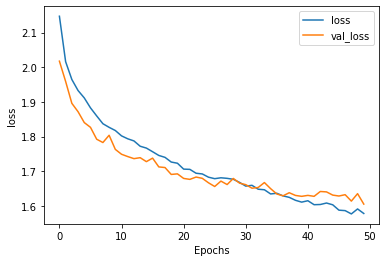

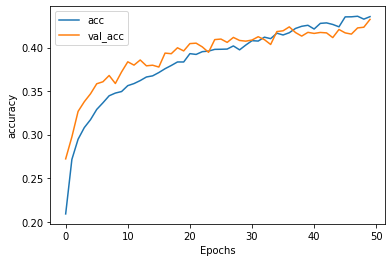

In [11]:
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']

plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])

In [12]:
test_loss,test_accuracy = model.evaluate(x_test, y_test)
print(test_loss)
print(test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 1.6013 - accuracy: 0.4356
1.601314902305603
0.43560001254081726


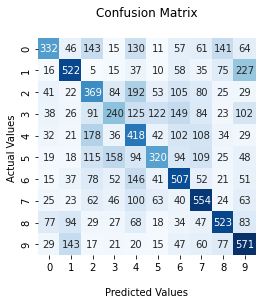

              precision    recall  f1-score   support

           0      0.532     0.332     0.409      1000
           1      0.548     0.522     0.535      1000
           2      0.339     0.369     0.354      1000
           3      0.346     0.240     0.283      1000
           4      0.314     0.418     0.359      1000
           5      0.460     0.320     0.378      1000
           6      0.425     0.507     0.462      1000
           7      0.466     0.554     0.506      1000
           8      0.540     0.523     0.532      1000
           9      0.451     0.571     0.504      1000

    accuracy                          0.436     10000
   macro avg      0.442     0.436     0.432     10000
weighted avg      0.442     0.436     0.432     10000



In [13]:
#confusion matrix
y_pred = model.predict(x_test)
y_pred_temp = []

for i in range(len(y_pred)):
  pred_index = np.argmax(y_pred[i])
  y_pred_temp.append(pred_index)
y_test_temp = []
for i in range(len(y_test)):
  test_index = np.argmax(y_test[i])
  y_test_temp.append(test_index)

matrix_confusion = metrics.confusion_matrix(y_test_temp, y_pred_temp)
mc = sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
mc.set_title('Confusion Matrix\n');
mc.set_xlabel('\nPredicted Values')
mc.set_ylabel('Actual Values ');
plt.show()

#calculating other metrics
print(metrics.classification_report(y_test_temp, y_pred_temp, digits=3))

  ## PCA

In [14]:
#Reshaping datas
x_train_pca = x_train.reshape(x_train.shape[0],32*32)
# y_train_pca = y_train.reshape(y_train.shape[0],32*32)

x_valid_pca = x_valid.reshape(x_valid.shape[0],32*32)
# y_valid_pca = y_valid.reshape(y_valid.shape[0],32*32)

x_test_pca = x_test.reshape(x_test.shape[0],32*32)
# y_test_pca = y_test.reshape(y_test.shape[0],32*32)


In [15]:
# print(x_train_pca.shape)

In [41]:
from numpy import linalg as la 
covmat_train = np.cov(x_train_pca.T)
value_train , vector_train = la.eig(covmat_train)
sortedavlue_train = np.sort(value_train)[::-1]
ind_train=[]
for i in range(len(sortedavlue_train)):
  for j in range(len(value_train)):
    if sortedavlue_train[i] == value_train[j]:
      ind_train.append(j)
      break
ind_train = ind_train[:400]
vector_train = vector_train[ind_train]
encoded_train = np.matmul(x_train_pca, vector_train.T)
encoded_test = np.matmul(x_test_pca, vector_train.T)
encoded_valid = np.matmul(x_valid_pca, vector_train.T)

#### Creating Model

In [62]:
from keras import layers
model = tf.keras.Sequential()

activation_func = 'relu'
# activation_func = tf.keras.activations.tanh
# activation_func = tf.keras.activations.sigmoid
# activation_func = tf.keras.activations.softmax

model.add(layers.Flatten(input_shape = (400, 1)))
model.add(layers.Dense(400, activation=activation_func))
model.add(layers.Dropout(0.3))

# #using more layer between encoder and decoder
# model.add(layers.Dense(600, activation=activation_func))
# model.add(layers.Dropout(0.3))

model.add(layers.Dense(700, activation=activation_func))
model.add(layers.Dropout(0.3))

#last layer
model.add(layers.Dense(10, activation='softmax'))

#### Compiling the Model

In [63]:
loss_func = 'categorical_crossentropy'
# loss_func = 'mean_squared_error'
# loss_func = 'mean_absolute_error'

optimizer_func = 'adam'
# optimizer_func = tf.keras.optimizers.SGD(learning_rate = 0.1)
# optimizer_func = tf.keras.optimizers.Adagrad(learning_rate = 0.1)

model.compile(loss=loss_func,
              optimizer=optimizer_func,
              metrics=['accuracy'])

#### Training the Model

In [64]:
import datetime
start = datetime.datetime.now()
trainedModel = model.fit(encoded_train, y_train, batch_size=512, epochs=50, validation_data = (encoded_valid,y_valid))
end = datetime.datetime.now()

Epoch 1/50
79/79 [==============================] - 2s 15ms/step - loss: 2.0768 - accuracy: 0.2460 - val_loss: 1.9444 - val_accuracy: 0.3091
Epoch 2/50
79/79 [==============================] - 1s 13ms/step - loss: 1.9255 - accuracy: 0.3085 - val_loss: 1.8978 - val_accuracy: 0.3226
Epoch 3/50
79/79 [==============================] - 1s 12ms/step - loss: 1.8700 - accuracy: 0.3320 - val_loss: 1.8245 - val_accuracy: 0.3503
Epoch 4/50
79/79 [==============================] - 1s 9ms/step - loss: 1.8187 - accuracy: 0.3541 - val_loss: 1.7810 - val_accuracy: 0.3717
Epoch 5/50
79/79 [==============================] - 1s 9ms/step - loss: 1.7839 - accuracy: 0.3664 - val_loss: 1.7649 - val_accuracy: 0.3724
Epoch 6/50
79/79 [==============================] - 1s 8ms/step - loss: 1.7626 - accuracy: 0.3762 - val_loss: 1.7277 - val_accuracy: 0.3869
Epoch 7/50
79/79 [==============================] - 1s 7ms/step - loss: 1.7308 - accuracy: 0.3865 - val_loss: 1.6982 - val_accuracy: 0.3981
Epoch 8/50
79/79 

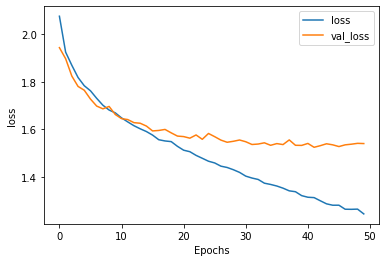

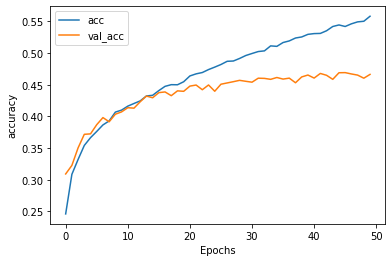

In [65]:
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']

plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])

In [66]:
test_loss,test_accuracy = model.evaluate(encoded_test, y_test)
print(test_loss)
print(test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 1.5406 - accuracy: 0.4601
1.5406121015548706
0.460099995136261


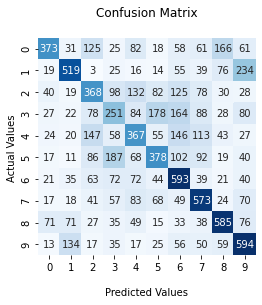

              precision    recall  f1-score   support

           0      0.600     0.373     0.460      1000
           1      0.590     0.519     0.552      1000
           2      0.385     0.368     0.376      1000
           3      0.298     0.251     0.272      1000
           4      0.378     0.367     0.373      1000
           5      0.431     0.378     0.403      1000
           6      0.429     0.593     0.498      1000
           7      0.489     0.573     0.528      1000
           8      0.557     0.585     0.570      1000
           9      0.475     0.594     0.528      1000

    accuracy                          0.460     10000
   macro avg      0.463     0.460     0.456     10000
weighted avg      0.463     0.460     0.456     10000



In [67]:
#confusion matrix
y_pred = model.predict(encoded_test)
y_pred_temp = []

for i in range(len(y_pred)):
  pred_index = np.argmax(y_pred[i])
  y_pred_temp.append(pred_index)
y_test_temp = []
for i in range(len(y_test)):
  test_index = np.argmax(y_test[i])
  y_test_temp.append(test_index)

matrix_confusion = metrics.confusion_matrix(y_test_temp, y_pred_temp)
mc = sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
mc.set_title('Confusion Matrix\n');
mc.set_xlabel('\nPredicted Values')
mc.set_ylabel('Actual Values ');
plt.show()

#calculating other metrics
print(metrics.classification_report(y_test_temp, y_pred_temp, digits=3))

## Auto-Encoder

#### Creating Model

In [23]:
from keras import layers
model = tf.keras.Sequential()

activation_func = 'relu'
# activation_func = tf.keras.activations.tanh
# activation_func = tf.keras.activations.sigmoid
# activation_func = tf.keras.activations.softmax

model.add(layers.Flatten(input_shape = (32, 32, 1)))
model.add(layers.Dense(400, activation=activation_func))
model.add(layers.Dropout(0.3))

#using more layer between encoder and decoder
model.add(layers.Dense(600, activation=activation_func))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(1024, activation=activation_func))
model.add(layers.Dropout(0.3))

#last layer
model.add(layers.Dense(10, activation='softmax'))

#### Compiling the Model

In [24]:
loss_func = 'categorical_crossentropy'
# loss_func = 'mean_squared_error'
# loss_func = 'mean_absolute_error'

optimizer_func = 'adam'
# optimizer_func = tf.keras.optimizers.SGD(learning_rate = 0.1)
# optimizer_func = tf.keras.optimizers.Adagrad(learning_rate = 0.1)

model.compile(loss=loss_func,
              optimizer=optimizer_func,
              metrics=['accuracy'])

#### Training the Model

In [25]:
import datetime
start = datetime.datetime.now()
trainedModel = model.fit(x_train, y_train, batch_size=512, epochs=50, validation_data = (x_valid,y_valid))
end = datetime.datetime.now()

Epoch 1/50
79/79 [==============================] - 2s 15ms/step - loss: 2.1277 - accuracy: 0.2117 - val_loss: 2.0302 - val_accuracy: 0.2670
Epoch 2/50
79/79 [==============================] - 1s 11ms/step - loss: 1.9988 - accuracy: 0.2789 - val_loss: 1.9443 - val_accuracy: 0.2992
Epoch 3/50
79/79 [==============================] - 1s 11ms/step - loss: 1.9560 - accuracy: 0.2970 - val_loss: 1.9063 - val_accuracy: 0.3124
Epoch 4/50
79/79 [==============================] - 1s 11ms/step - loss: 1.9224 - accuracy: 0.3078 - val_loss: 1.8608 - val_accuracy: 0.3332
Epoch 5/50
79/79 [==============================] - 1s 12ms/step - loss: 1.9118 - accuracy: 0.3103 - val_loss: 1.8564 - val_accuracy: 0.3299
Epoch 6/50
79/79 [==============================] - 1s 11ms/step - loss: 1.8804 - accuracy: 0.3230 - val_loss: 1.8182 - val_accuracy: 0.3474
Epoch 7/50
79/79 [==============================] - 1s 12ms/step - loss: 1.8710 - accuracy: 0.3273 - val_loss: 1.8097 - val_accuracy: 0.3511
Epoch 8/50
79

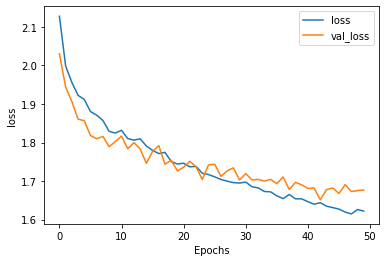

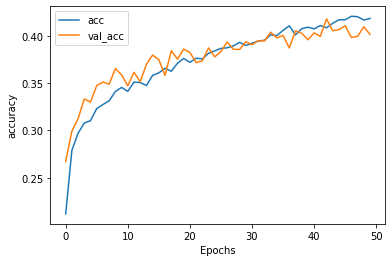

In [26]:
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']

plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])

In [27]:
test_loss,test_accuracy = model.evaluate(x_test, y_test)
print(test_loss)
print(test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 1.6737 - accuracy: 0.4075
1.6736782789230347
0.4074999988079071


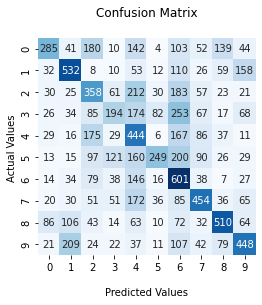

              precision    recall  f1-score   support

           0      0.513     0.285     0.366      1000
           1      0.511     0.532     0.521      1000
           2      0.325     0.358     0.341      1000
           3      0.353     0.194     0.250      1000
           4      0.277     0.444     0.341      1000
           5      0.546     0.249     0.342      1000
           6      0.320     0.601     0.417      1000
           7      0.481     0.454     0.467      1000
           8      0.547     0.510     0.528      1000
           9      0.479     0.448     0.463      1000

    accuracy                          0.407     10000
   macro avg      0.435     0.408     0.404     10000
weighted avg      0.435     0.407     0.404     10000



In [28]:
#confusion matrix
y_pred = model.predict(x_test)
y_pred_temp = []

for i in range(len(y_pred)):
  pred_index = np.argmax(y_pred[i])
  y_pred_temp.append(pred_index)
y_test_temp = []
for i in range(len(y_test)):
  test_index = np.argmax(y_test[i])
  y_test_temp.append(test_index)

matrix_confusion = metrics.confusion_matrix(y_test_temp, y_pred_temp)
mc = sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
mc.set_title('Confusion Matrix\n');
mc.set_xlabel('\nPredicted Values')
mc.set_ylabel('Actual Values ');
plt.show()

#calculating other metrics
print(metrics.classification_report(y_test_temp, y_pred_temp, digits=3))

## Correlation Matrix for question 2 data set

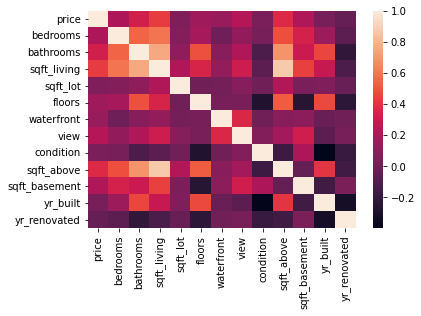

In [33]:
import pandas as pd

my_file = pd.read_csv('data.csv')
sns.heatmap(my_file.corr())

## Linear Regression Compairing

In [34]:
my_file.date = my_file.date.astype("category").cat.codes
my_file.street = my_file.street.astype("category").cat.codes
my_file.city = my_file.city.astype("category").cat.codes
my_file.statezip = my_file.statezip.astype("category").cat.codes
my_file.country = my_file.country.astype("category").cat.codes

my_file = (my_file-my_file.min() + 1)/(my_file.max()-my_file.min() + 1)
y = my_file['price']
x = my_file.drop(['price'],axis=1)

date               7.082101
bedrooms          35.708040
bathrooms         31.571004
sqft_living       65.001933
sqft_lot          17.931301
floors            12.672670
waterfront        20.796612
view              27.746467
condition         15.430248
sqft_above       100.000000
sqft_basement     44.457767
yr_built          49.666673
yr_renovated       5.487525
street             0.609709
city              27.171426
statezip          22.029266
country            0.000000
Name: importance_normalized, dtype: float64


<BarContainer object of 17 artists>

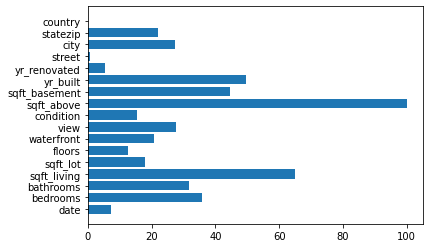

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)

features = pd.DataFrame(regressor.coef_, x.columns, columns=['coefficient'])
features.coefficient = features.coefficient.abs()

stdevs = []
for i in x.columns:
    stdev = my_file[i].std()
    stdevs.append(stdev)
features["stdev"] = np.array(stdevs).reshape(-1,1)
features["importance"] = features["coefficient"] * features["stdev"]
features['importance_normalized'] = 100*features['importance'] / features['importance'].max()
print(features['importance_normalized'])
plt.barh(features.index, features.importance_normalized)

### Decision Tree Compairing

<BarContainer object of 17 artists>

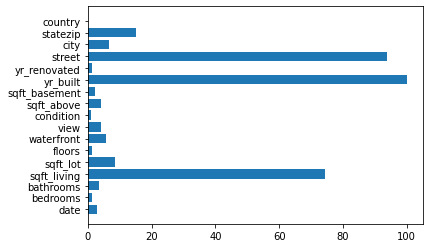

In [36]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x, y)
importance = model.feature_importances_
importance = 100*importance / importance.max()
plt.barh(x.columns, importance)